In [1]:
# to calculate mpg as a function of other attributes

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split #sklearn's randomised data splitting function

In [3]:
car_df = pd.read_csv("auto-mpg.csv")

In [4]:
car_df.shape

(398, 9)

In [5]:
car_df.tail(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
388,26.0,4,156.0,92,2585,14.5,82,1,chrysler lebaron medallion
389,22.0,6,232.0,112,2835,14.7,82,1,ford granada l
390,32.0,4,144.0,96,2665,13.9,82,3,toyota celica gt
391,36.0,4,135.0,84,2370,13.0,82,1,dodge charger 2.2
392,27.0,4,151.0,90,2950,17.3,82,1,chevrolet camaro
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [6]:
car_df = car_df.drop('car name',axis = 1)

In [7]:
car_df.min()

mpg        9.0
cyl          3
disp      68.0
hp         100
wt        1613
acc        8.0
yr          70
origin       1
dtype: object

In [8]:
car_df['origin'] = car_df['origin'].replace({1:'america',2:'europe',3:'asia'})
car_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


In [9]:
#to convert categorical data of origin to numerical
car_df = pd.get_dummies(car_df,columns = ['origin'])
car_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


In [10]:
car_df.describe() #horsepower not showing

,mpg,cyl,disp,wt,acc,yr,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [11]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cyl             398 non-null    int64  
 2   disp            398 non-null    float64
 3   hp              398 non-null    object 
 4   wt              398 non-null    int64  
 5   acc             398 non-null    float64
 6   yr              398 non-null    int64  
 7   origin_america  398 non-null    uint8  
 8   origin_asia     398 non-null    uint8  
 9   origin_europe   398 non-null    uint8  
dtypes: float64(3), int64(3), object(1), uint8(3)
memory usage: 23.1+ KB


In [12]:

car_df.isnull().sum()

mpg               0
cyl               0
disp              0
hp                0
wt                0
acc               0
yr                0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

In [13]:
digithp = pd.DataFrame(car_df.hp.str.isdigit()) #TRUE IF Horsepower IS DIGIT
car_df[digithp['hp'] == False] #to show all false values

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [14]:
car_df = car_df.replace('?',np.nan)
car_df[digithp['hp'] == False]

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


In [15]:
car_df.median()

mpg                 23.0
cyl                  4.0
disp               148.5
hp                  93.5
wt                2803.5
acc                 15.5
yr                  76.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [16]:
#replace missing hp values with median

medianfiller = lambda x:x.fillna(x.median())
car_df = car_df.apply(medianfiller,axis=0)

car_df['hp']=car_df['hp'].astype('float64')  #converting dtype of hp from object to float

In [17]:
car_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


In [18]:
car_df = car_df.drop('disp',axis=1)

In [19]:
car_df = car_df.drop('hp',axis=1)

In [20]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cyl             398 non-null    int64  
 2   wt              398 non-null    int64  
 3   acc             398 non-null    float64
 4   yr              398 non-null    int64  
 5   origin_america  398 non-null    uint8  
 6   origin_asia     398 non-null    uint8  
 7   origin_europe   398 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 16.8 KB


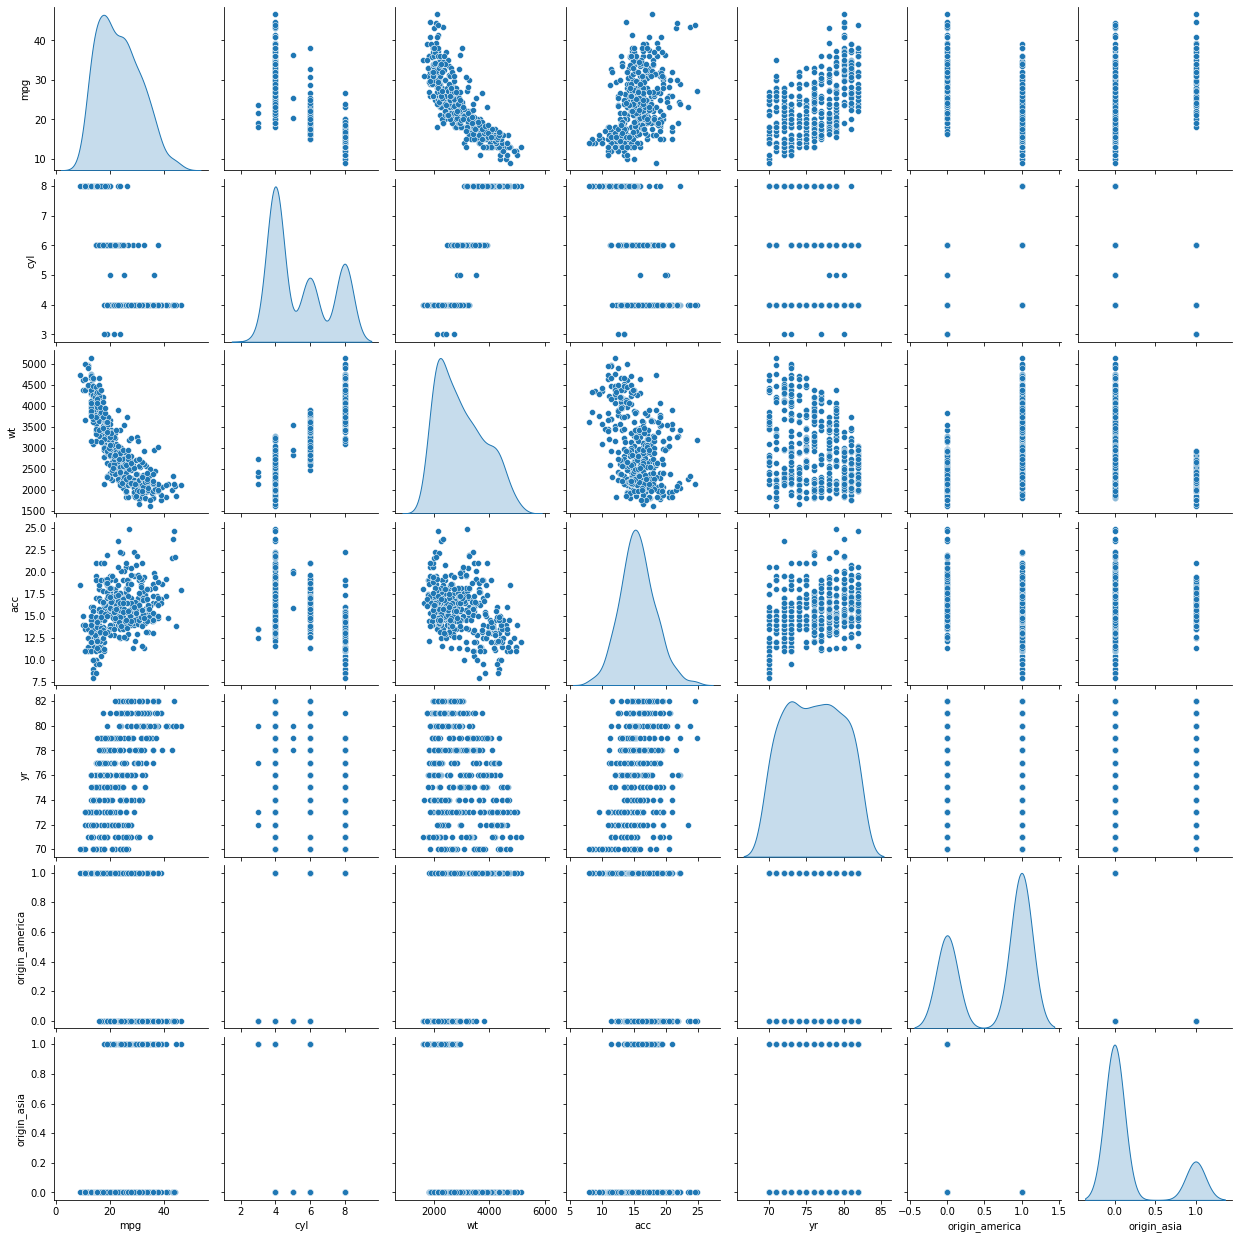

In [21]:
car_df_attr = car_df.iloc[:, 0:7]
sns.pairplot(car_df_attr, diag_kind='kde')   # to plot density curve instead of histogram on the diag

In [22]:
#splitting the data 
x = car_df.drop(['mpg'],axis = 1) #dependent variable is dropped
y = car_df['mpg']


In [23]:
x_train,x_test,y_train,y_test, = train_test_split(x, y, test_size=0.3, random_state=1)

In [24]:
#linear regression
reg_model =  LinearRegression().fit(x_train,y_train)


In [25]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, reg_model.coef_[0][idx]))

IndexError: invalid index to scalar variable.

In [ ]:
intercept = reg_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

In [ ]:
reg_model.score(x_train, y_train)

In [ ]:
#out of sample score (R^2)

reg_model.score(x_test, y_test)


In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(x_train2, y_train)

y_pred = poly_clf.predict(x_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(x_train2, y_train))

0.8922620269911195


In [27]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(x_test2, y_test))

0.8742853868989757


In [28]:
print(x_train.shape)
print(x_train2.shape)

(278, 7)
(278, 29)


In [29]:
corr = car_df.corr()
corr

,mpg,cyl,wt,acc,yr,origin_america,origin_asia,origin_europe
mpg,1.000000,-0.775396,-0.831741,0.420289,0.579267,-0.568192,0.442174,0.259022
cyl,-0.775396,1.000000,0.896017,-0.505419,-0.348746,0.604351,-0.396479,-0.352861
wt,-0.831741,0.896017,1.000000,-0.417457,-0.306564,0.598398,-0.440817,-0.298843
acc,0.420289,-0.505419,-0.417457,1.000000,0.288137,-0.250806,0.109144,0.204473
yr,0.579267,-0.348746,-0.306564,0.288137,1.000000,-0.139883,0.193101,-0.024489
origin_america,-0.568192,0.604351,0.598398,-0.250806,-0.139883,1.000000,-0.643317,-0.597198
origin_asia,0.442174,-0.396479,-0.440817,0.109144,0.193101,-0.643317,1.000000,-0.229895
origin_europe,0.259022,-0.352861,-0.298843,0.204473,-0.024489,-0.597198,-0.229895,1.000000
